# **Images Only**

In [1]:
import pandas as pd
import os
import pickle
import numpy as np

import os
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#DenseNet121 Model:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.densenet import preprocess_input
from sklearn.model_selection import train_test_split

#MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.densenet import preprocess_input
from sklearn.model_selection import train_test_split

# Confusion Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Mounting the Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading Images
with open("/content/drive/MyDrive/Plankton/image_dataframe.pkl", "rb") as f:
    df = pickle.load(f)

print(df.head())
print(df.columns)


  Image_Class                                       Image_Matrix
0         mix  [[204, 204, 204, 203, 203, 203, 203, 200, 202,...
1         mix  [[200, 201, 203, 201, 199, 200, 202, 201, 199,...
2         mix  [[221, 222, 223, 224, 223, 222, 221, 222, 222,...
3         mix  [[192, 191, 188, 183, 182, 189, 185, 180, 185,...
4         mix  [[212, 212, 212, 212, 213, 213, 213, 211, 212,...
Index(['Image_Class', 'Image_Matrix'], dtype='object')


In [5]:
df['Image_Class'].unique()

array(['mix', 'Ciliate_mix', 'Dactyliosolen', 'Cerataulina',
       'mix_elongated', 'Cylindrotheca', 'Mesodinium_sp',
       'DactFragCerataul', 'Guinardia_striata', 'Ditylum',
       'Asterionellopsis', 'Chaetoceros', 'Leptocylindrus',
       'G_delicatula_parasite', 'bad', 'Corethron', 'Dictyocha',
       'Guinardia_delicatula', 'flagellate_sp3', 'Dinobryon', 'detritus',
       'dino30'], dtype=object)

## **Exploratory Data Analysis**

In [ ]:
counts = df["Image_Class"].value_counts()
print(counts)

Image_Class
mix                      500
Ciliate_mix              500
Dactyliosolen            500
Cerataulina              500
mix_elongated            500
Cylindrotheca            500
Mesodinium_sp            500
DactFragCerataul         500
Guinardia_striata        500
Ditylum                  500
Asterionellopsis         500
Chaetoceros              500
Leptocylindrus           500
G_delicatula_parasite    500
bad                      500
Corethron                500
Dictyocha                500
Guinardia_delicatula     500
flagellate_sp3           500
Dinobryon                500
detritus                 500
dino30                   500
Name: count, dtype: int64


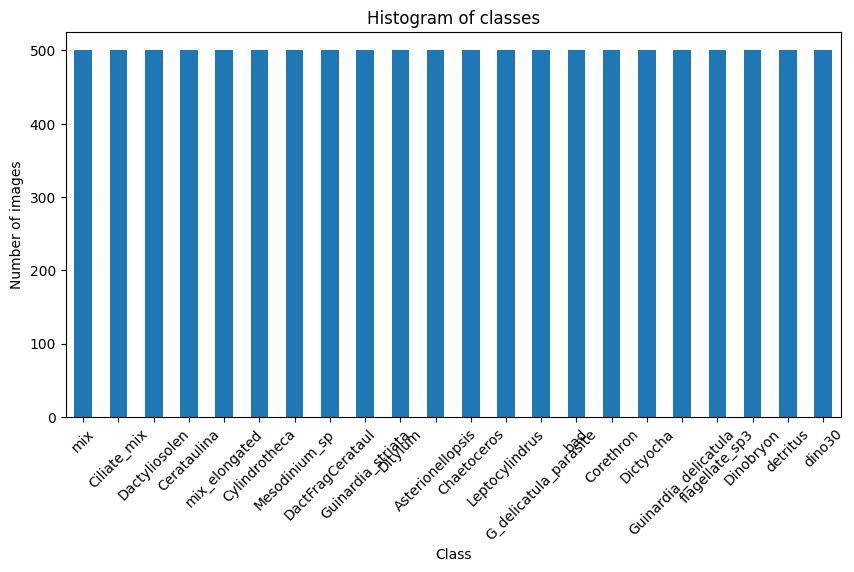

In [ ]:
plt.figure(figsize=(10,5))
counts.plot(kind="bar")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.title("Histogram of classes")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# df = df[~df['Image_Class'].isin(['mix'])]
# df = df[~df['Image_Class'].isin(['bad'])]
# df
df

,Image_Class,Image_Matrix
0,mix,"[[204, 204, 204, 203, 203, 203, 203, 200, 202,..."
1,mix,"[[200, 201, 203, 201, 199, 200, 202, 201, 199,..."
2,mix,"[[221, 222, 223, 224, 223, 222, 221, 222, 222,..."
3,mix,"[[192, 191, 188, 183, 182, 189, 185, 180, 185,..."
4,mix,"[[212, 212, 212, 212, 213, 213, 213, 211, 212,..."
...,...,...
10995,dino30,"[[194, 193, 194, 195, 195, 195, 192, 193, 194,..."
10996,dino30,"[[204, 205, 207, 209, 209, 208, 207, 207, 206,..."
10997,dino30,"[[179, 189, 187, 183, 191, 186, 186, 187, 194,..."
10998,dino30,"[[215, 216, 217, 219, 218, 218, 217, 217, 217,..."


## **DenseNet121 Model**

https://www.kaggle.com/code/jutrera/training-a-densenet-for-the-stanford-car-dataset (Training a DenseNet for the Stanford Car dataset)

In [6]:
df_clean = df[df["Image_Matrix"].notnull()].reset_index(drop=True)

df_clean = df_clean[~df_clean['Image_Class'].isin(['bad'])]
df_clean = df_clean[~df_clean['Image_Class'].isin(['mix_elongated'])]
df_clean = df_clean[~df_clean['Image_Class'].isin(['mix'])]
df_clean = df_clean[~df_clean['Image_Class'].isin(['detritus'])]

x = df_clean['Image_Matrix'].values
y = df_clean['Image_Class'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, stratify = y, train_size = 0.80)

### **Determining if width/height distribution of the images are the same for fine-tuning.**

In [8]:
# Determining if width/height distribution of the images
widths, heights = [], []

for img in df["Image_Matrix"]:
  if img is not None:
    h, w = img.shape[:2]   # height, width
    heights.append(h)
    widths.append(w)

print(f"Collected dimensions for {len(widths)} images (out of {len(df)})")


Collected dimensions for 10761 images (out of 11000)


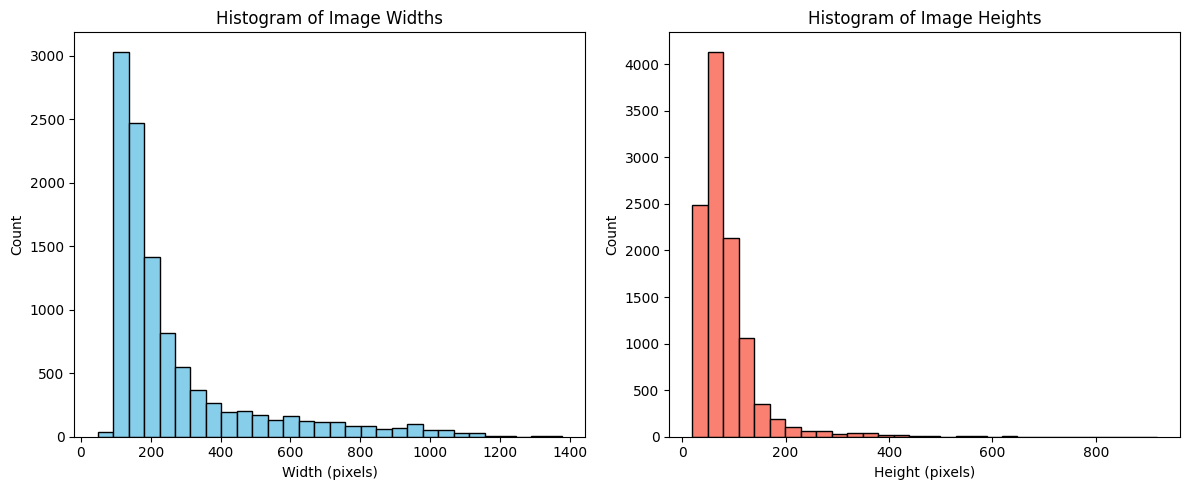

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(widths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.title("Histogram of Image Widths")

plt.subplot(1,2,2)
plt.hist(heights, bins=30, color='salmon', edgecolor='black')
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.title("Histogram of Image Heights")

plt.tight_layout()
plt.show()

In [10]:
def preprocess_images(images, img_size=224):
    processed = []
    for img in images:
        if img is None:  # skip bad images
            continue

        img = np.array(img)

        # If grayscale (H, W), add channel
        if img.ndim == 2:
            img = np.expand_dims(img, axis=-1)

        # Resize
        img = tf.image.resize(img, (img_size, img_size))

        # Convert grayscale → RGB (3 channels)
        if img.shape[-1] == 1:
            img = tf.image.grayscale_to_rgb(img)

        processed.append(img.numpy())
    return np.array(processed)

In [11]:
x_train = preprocess_input(preprocess_images(x_train, img_size = 224))
x_test = preprocess_input(preprocess_images(x_test, img_size = 224))

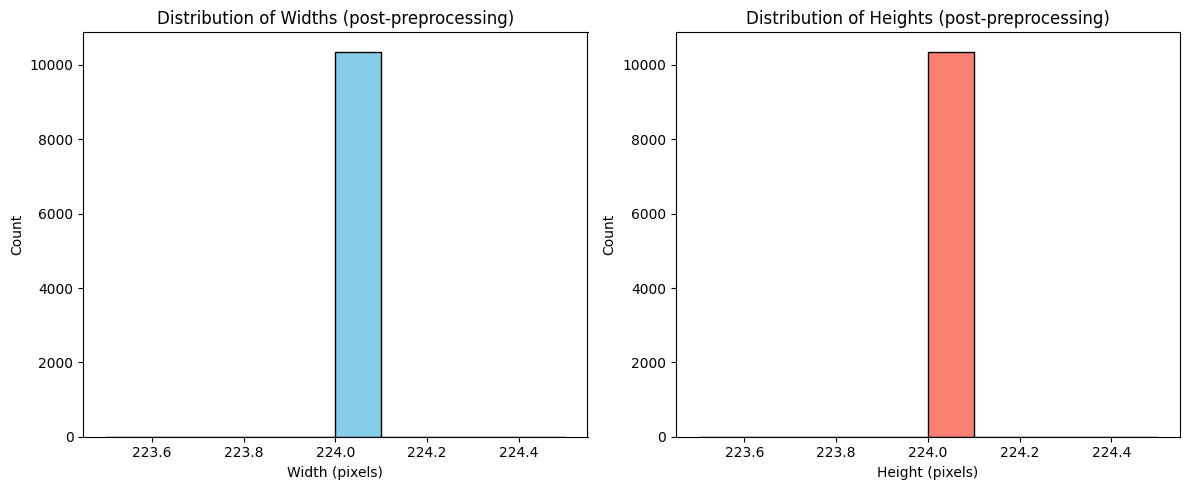

In [ ]:
# Extract shapes
heights = [img.shape[0] for img in x_train] + [img.shape[0] for img in x_test]
widths = [img.shape[1] for img in x_train] + [img.shape[1] for img in x_test]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(widths, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.title("Distribution of Widths (post-preprocessing)")

plt.subplot(1,2,2)
plt.hist(heights, bins=10, color='salmon', edgecolor='black')
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.title("Distribution of Heights (post-preprocessing)")

plt.tight_layout()
plt.show()

In [9]:
print("Any NaNs in x_train?", np.isnan(x_train).any())
print("Any NaNs in x_test?", np.isnan(x_test).any())

print("Any empty images in x_train?", np.any(np.sum(x_train, axis=(1,2,3)) == 0))
print("Any empty images in x_test?", np.any(np.sum(x_test, axis=(1,2,3)) == 0))

Any NaNs in x_train? False
Any NaNs in x_test? False
Any empty images in x_train? False
Any empty images in x_test? False


In [10]:
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())

Min pixel value: -2.117904
Max pixel value: 2.64


In [11]:
print("x_train shape:", x_train.shape)
print("x_train min/max:", x_train.min(), x_train.max())

x_train shape: (7088, 224, 224, 3)
x_train min/max: -2.117904 2.64


In [12]:
le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_test_int = le.transform(y_test)

num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train_int, num_classes)
y_test_cat = to_categorical(y_test_int, num_classes)

In [13]:
base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Freeze base model for transfer learning (optional)
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer
])

In [14]:
# Without the finetuning
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


**Fine Tuning**

In [14]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7
)

In [15]:
# 🔓 Unfreeze the last ~30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [16]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor= 'val_loss', patience=5, restore_best_weights=True
)

In [17]:
history_finetune = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=20,              # longer this time
    batch_size=64,          # maybe smaller for better generalization
    callbacks=[early_stop, lr_scheduler]  # if you add them
)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 110s 621ms/step - accuracy: 0.0631 - loss: 3.5680 - val_accuracy: 0.1862 - val_loss: 2.6131 - learning_rate: 1.0000e-05
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.1423 - loss: 2.9103 - val_accuracy: 0.4035 - val_loss: 2.1835 - learning_rate: 1.0000e-05
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.2141 - loss: 2.5650 - val_accuracy: 0.5310 - val_loss: 1.8618 - learning_rate: 1.0000e-05
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.3148 - loss: 2.2556 - val_accuracy: 0.6021 - val_loss: 1.6172 - learning_rate: 1.0000e-05
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.3695 - loss: 2.0360 - val_accuracy: 0.6490 - val_loss: 1.4300 - learning_rate: 1.0000e-05
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.4421 - loss: 1.8375 - val_accuracy: 0.6936 - val_loss: 1.2774 - learning_rate: 1.0000e-05
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 1

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 307ms/step - accuracy: 0.8537 - loss: 0.5103
Test Accuracy: 0.8668


In [15]:
history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=15,
    batch_size=64
)

# Hyperparameters to change: learning rate, batch size, dropout rate, type of optimizer

Epoch 1/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 96s 565ms/step - accuracy: 0.1155 - loss: 3.0553 - val_accuracy: 0.6021 - val_loss: 1.7499
Epoch 2/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.3935 - loss: 1.9746 - val_accuracy: 0.7161 - val_loss: 1.1378
Epoch 3/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.5488 - loss: 1.4633 - val_accuracy: 0.7827 - val_loss: 0.8492
Epoch 4/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.6299 - loss: 1.1844 - val_accuracy: 0.8030 - val_loss: 0.7060
Epoch 5/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.6821 - loss: 1.0215 - val_accuracy: 0.8397 - val_loss: 0.6094
Epoch 6/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.7046 - loss: 0.9371 - val_accuracy: 0.8488 - val_loss: 0.5498
Epoch 7/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.7384 - loss: 0.8159 - val_accuracy: 0.8600 - val_loss: 0.5084
Epoch 8/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.7569 - loss: 0.7779 -

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 297ms/step - accuracy: 0.8867 - loss: 0.3854
Test Accuracy: 0.8883


In [ ]:
preds = model.predict(x_test)
pred_labels = le.inverse_transform(np.argmax(preds, axis=1))

print(pred_labels[:10])  # first 10 predicted labels

68/68 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step
['Cylindrotheca' 'G_delicatula_parasite' 'Dinobryon' 'flagellate_sp3'
 'Dactyliosolen' 'Mesodinium_sp' 'Mesodinium_sp' 'Ciliate_mix'
 'G_delicatula_parasite' 'flagellate_sp3']


## **MobileNetV2**

In [17]:
le = LabelEncoder()
y_train_int_m = le.fit_transform(y_train)
y_test_int_m = le.transform(y_test)

In [18]:
num_classes_m = len(le.classes_)
y_train_cat = to_categorical(y_train_int_m, num_classes_m)
y_test_cat = to_categorical(y_test_int_m, num_classes_m)

In [19]:
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))

# Freeze base model for transfer learning
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes_m, activation='softmax')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [20]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [21]:
history = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=15,
    batch_size=64
)


Epoch 1/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 65s 407ms/step - accuracy: 0.1753 - loss: 2.7707 - val_accuracy: 0.6665 - val_loss: 1.3559
Epoch 2/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.5323 - loss: 1.5441 - val_accuracy: 0.7455 - val_loss: 0.9315
Epoch 3/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6456 - loss: 1.1667 - val_accuracy: 0.7777 - val_loss: 0.7705
Epoch 4/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6921 - loss: 1.0018 - val_accuracy: 0.8002 - val_loss: 0.6855
Epoch 5/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7223 - loss: 0.9088 - val_accuracy: 0.8121 - val_loss: 0.6295
Epoch 6/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7447 - loss: 0.8085 - val_accuracy: 0.8324 - val_loss: 0.5947
Epoch 7/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7691 - loss: 0.7513 - val_accuracy: 0.8459 - val_loss: 0.5579
Epoch 8/15
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7830 - loss: 0.7082 - val_ac

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 316ms/step - accuracy: 0.8659 - loss: 0.4731
Test Accuracy: 0.8708


In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step


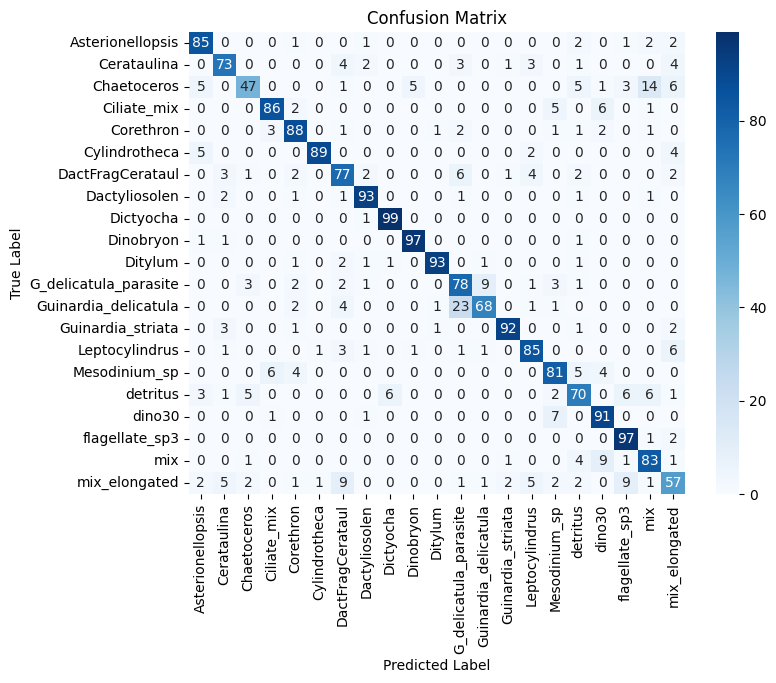

In [ ]:
cm = confusion_matrix(y_true, y_pred)

class_names = le.classes_
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### **Fine-tuning**

In [19]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-7
)

In [20]:
# 🔓 Unfreeze the last ~30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Recompile with a lower learning rate for fine-tuning
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor= 'val_loss', patience=5, restore_best_weights=True
)

In [ ]:
history_finetune = model.fit(
    x_train, y_train_cat,
    validation_data=(x_test, y_test_cat),
    epochs=20,              # longer this time
    batch_size=64,          # maybe smaller for better generalization
    callbacks=[early_stop, lr_scheduler]  # if you add them
)